# Etude sur le 1,4 dioxane
date: 12/02/2025

author: Thomas Buffet

## Cadre de l'étude
Base de données "Eau distribuée par commune" 
https://www.data.gouv.fr/fr/datasets/resultats-du-controle-sanitaire-de-leau-distribuee-commune-par-commune/

## C'est quoi le 1,4 dioxane

Le 1,4-dioxane est un éther cyclique de formule chimique C₄H₈O₂, utilisé principalement comme solvant industriel dans la fabrication de peintures, vernis et produits pharmaceutiques. Il peut également être présent en tant qu'impureté dans certains cosmétiques et détergents. Il a été classé comme cancérigène probable pour l'homme (2B) par le CIRC. Sa forte solubilité dans l'eau et sa stabilité chimique en font un contaminant préoccupant pour les ressources en eau.


## Quelques ressources externes utiles
- [Page Wikipédia](https://fr.wikipedia.org/wiki/1,4-Dioxane)
- Étude de l'ANSES (Agence nationale de sécurité sanitaire de l'alimentation, de l'environnement et du travail) : [Campagne nationale de mesure de l’occurrence de composés émergents dans les eaux destinées à la consommation humaine | Pesticides et métabolites de pesticides – Résidus d’explosifs – 1,4-dioxane | Campagne 2020-2022](https://www.anses.fr/fr/system/files/LABORATOIRE2022AST0255Ra.pdf)
- [Rapport de l'OMS sur le 1,4 dioxane](https://www.who.int/docs/default-source/wash-documents/wash-chemicals/dioxane-background-document.pdf)
- [Rapport du CIRC](https://publications.iarc.fr/Book-And-Report-Series/Iarc-Monographs-On-The-Identification-Of-Carcinogenic-Hazards-To-Humans/Re-evaluation-Of-Some-Organic-Chemicals-Hydrazine-And-Hydrogen-Peroxide-Part-1-Part-2-Part-3--1999)
- [Le Dauphiné Libéré - "Pollution de l'eau potable : qu'est-ce que le dioxane, ce solvant potentiellement cancérigène ?"](https://www.ledauphine.com/sante/2023/07/03/pollution-de-l-eau-potable-qu-est-ce-que-le-dioxane-ce-solvant-potentiellement-cancerigene)
- Droit de réponse du SEDIF sur des articles du Parisien suite à la publication du rapport de l'ANSES : [Articles du Parisien sur le 1,4-dioxane en Ile-de-France : on fait le point](https://www.sedif.com/articlesduparisiensurle14dioxaneeniledefrancefaitlepoint)

## Les objectifs de cette étude : 
1) Combien de prélévements de 1,4 dioxane ont été réalisés en 2024 ?
2) Combien étaient conformes/non conformes (dépassant la limite de qualité) en 2024 ?
3) Quelles ARS recherchent ces polluants en 2024 ? Combien d'ARS par région ?
4) Quelles catégories de situation existent en 2024 (NC0, NC1...) ? Sur quelles communes? 
5) Mêmes questions pour les années de 2020 à 2023, quelle est l'évolution ?


# Récapitulatif global des résultats de l'étude:
- Très peu de communes réalisent des tests de 1,4 dioxane depuis 2021 (2 communes max, <20 tests en tout). Il y en avait un peu plus en 2020 (10 communes, 145 test en tout).
- Avec une limite de qualité à 0.1µg/L, il y a une majorité de tests non conformes dans la commune de BOLBEL depuis 2022. 

# Questions restées en suspens : 
- Le seuil de 0.1µg/L est-il correct ?

# Import des librairies et des données

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import duckdb
from pipelines.tasks._common import DUCKDB_FILE

# Chargement de la base de données

pd.set_option("display.max_columns", None)  # show all cols
pd.set_option("display.max_colwidth", None)  # show full width of showing cols
pd.set_option(
    "display.expand_frame_repr", False
)  # print cols side by side as it's supposed to be

con = duckdb.connect(database=DUCKDB_FILE, read_only=True)

# Objectif 1
Déterminer combien de prélévements de 1,4 dioxane ont été réalisés en 2024.

Sous objectifs
- 


In [3]:
where_clause = """
"dateprel" >= '2024-01-01'
"""

query = f"""
SELECT
  "edc_prelevements"."referenceprel",
  "edc_prelevements"."cdreseau",
  "edc_prelevements"."dateprel",
  "edc_prelevements"."nomcommuneprinc",
  "edc_resultats"."libminparametre",
  "edc_resultats"."valtraduite",
  "edc_resultats"."cdunitereferencesiseeaux",
  "edc_resultats"."limitequal",
  
  
FROM (
  SELECT
    *
  FROM "edc_prelevements" 
  WHERE
    {where_clause}
) AS edc_prelevements
INNER JOIN "edc_resultats"
  ON "edc_prelevements"."referenceprel" = "edc_resultats"."referenceprel"
  AND "edc_resultats"."libminparametre" IN ('1,4 dioxane')
"""


joined = con.sql(query)
joined_df = joined.df()
joined_df

,referenceprel,cdreseau,dateprel,nomcommuneprinc,libminparametre,valtraduite,cdunitereferencesiseeaux,limitequal
0,05200101231,052000760,2024-12-13,VECQUEVILLE,"1,4 dioxane",0.84,µg/L,None
1,07600290630,076000543,2024-01-09,BOLBEC,"1,4 dioxane",0.20,µg/L,None
2,07600292139,076000543,2024-03-05,BOLBEC,"1,4 dioxane",0.16,µg/L,None
3,07600292368,076000543,2024-04-02,BOLBEC,"1,4 dioxane",0.12,µg/L,None
4,07600293448,076000543,2024-06-04,BOLBEC,"1,4 dioxane",0.14,µg/L,None
5,07600294050,076000543,2024-07-02,BOLBEC,"1,4 dioxane",0.14,µg/L,None
6,07600295005,076000543,2024-08-20,BOLBEC,"1,4 dioxane",0.14,µg/L,None
7,07600296158,076000543,2024-10-01,BOLBEC,"1,4 dioxane",0.00,µg/L,None
8,07600296746,076000543,2024-11-05,BOLBEC,"1,4 dioxane",0.00,µg/L,None
9,07600291409,076000543,2024-02-06,BOLBEC,"1,4 dioxane",0.41,µg/L,None


In [ ]:
# Pour quantifier le nombre de prélévements, j'identifie les combinaisons uniques des paramètres 'referenceprel', 'cdreseau' et'libminparametre'
joined_df = joined_df.drop_duplicates(
    subset=["referenceprel", "cdreseau", "libminparametre"]
)
print(f"Il y a eu {len(joined_df)} recherches de 1,4 dioxane en 2024")

Il y a eu 10 recherches de 1,4 dioxane en 2024


## Résultats de l'objectif 1 : 
- Il y a eu 10  recherches de 1,4 dioxane en 2024.

#### Questions en suspens : 
- 

# Objectif 2
Déterminer combien de prélévements de 1,4 dioxane étaient conformes et non conformes en 2024.

Sous objectifs
- Détermination d'un seuil
- quantification des dépassements de seuil


Pas de seuil indiqué dans la base de données.
Je prend le seuil "par défaut" de <= 0.1µg/L

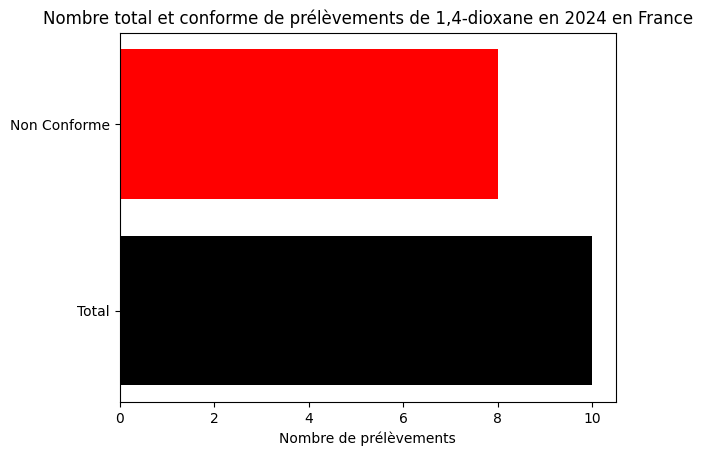

In [ ]:
# Réprésentation des prélévement pour chaque composé en 2024

compound = "1,4 dioxane"
seuils = {"1,4 dioxane": 0.1}

# Calcul du nombre total et du nombre de prélévements non conformes
data = {
    "Total": len(joined_df[joined_df["libminparametre"] == compound]),
    "Non Conforme": len(
        joined_df[
            (joined_df["libminparametre"] == compound)
            & (joined_df["valtraduite"] >= seuils[compound])
        ]
    ),
}

# Création du graphique à barres horizontal
fig, ax = plt.subplots()
ax.barh(list(data.keys()), list(data.values()), color=["k", "r"])

# Ajout des labels et du titre
ax.set_xlabel("Nombre de prélèvements")
ax.set_title(
    "Nombre total et conforme de prélèvements de 1,4-dioxane en 2024 en France"
)

# Affichage du graphique
plt.show()

# Objectif 3
Déterminer quelles ARS réalisent ces prélévements.

Sous objectifs
- 


In [18]:
joined_df["nomcommuneprinc"].unique()

array(['VECQUEVILLE', 'BOLBEC'], dtype=object)

In [20]:
print(
    f"{joined_df['nomcommuneprinc'].unique().shape[0]} communes ont réalisés des prélévements de 1,4 dioxane en 2024"
)

2 communes ont réalisés des prélévements de 1,4 dioxane en 2024


## Résultats Objectif 3

- 2 communes ont réalisés des prélévements de 1,4 dioxane en 2024

### Questions restant en suspens
- Qu'est-ce qui est attendu exactement ici ? Regrouper les communes par régions pour identifier les ARS ?
    - Pour info, BOLBEC est en Seine-Maritime, donc [ARS Normandie](https://www.normandie.ars.sante.fr/la-qualite-de-leau-dans-votre-commune) ; Veucqueville en Haute-Marne, donc [ARS Grand Est](https://www.grand-est.ars.sante.fr/la-qualite-de-leau-potable).

# Objectif 4
Déterminer quelles catégories de situation existent en 2024 (NC0, NC1...). Sur quelles communes? 

Pour rappel :
- Si C < limitequal, situation C
- Si C > limitequal pendant moins de 30 jours cumulés sur 12 mois, situation NC0
- Si C > limitequal pendant plus de 30 jours cumulés sur 12 mois, situation NC1
- Si C > Vmax, situation NC2 (non applicable ici car pas de Vmax définie)
Voir https://outline.services.dataforgood.fr/doc/espace-de-travail-data-analysts-Q3VWrKUd2g


Sous objectifs
- 


In [14]:
### Work in progress


## Résultats Objectif 4

**TODO**

### Questions restées en suspens
- Quelle définition prend-on exactement pour NC0 et NC1 ? Est-ce que s'il y a un seul prélévement non conforme, et aucun prélévement qui indique un retour en conformité, on garde l'alerte la plus haute NC1 ? Ou bien il faut un deuxième prélévement pour prouver que la commune est restée en non conformité ?
- Comment faire si on n'a pas de Vmax ? En rechercher une dans des rapports de l'ANSES, ou autres publications ?

# Objectif 5
Etendre l'analyse aux autres années et analyser l'évolution.

Sous objectifs
1) Combien de prélévements de 1,4 dioxane ont été réalisés ?
2) Combien étaient conformes/non conformes (dépassant la limite de qualité) ?
3) Quelles ARS recherchent ces polluants ? Combien d'ARS par région ?
4) Quelles catégories de situation existent (NC0, NC1...) ? Sur quelles communes? 


## Objectif 5.1 : combien de prélévements ont été réalisé chaque année ?

In [ ]:
years = ["2020", "2021", "2022", "2023", "2024"]

In [ ]:
analysis = {}

for year in years:
    print(f"Loading {compound} analyses from year {year}...")

    where_clause = f"""
    "dateprel" >= '{year}-01-01'
    AND
    "dateprel" <= '{year}-12-31'
    """

    query = f"""
    SELECT
      "edc_prelevements"."referenceprel",
      "edc_prelevements"."cdreseau",
      "edc_prelevements"."dateprel",
      "edc_prelevements"."nomcommuneprinc",
      "edc_resultats"."libminparametre",
      "edc_resultats"."valtraduite",
      "edc_resultats"."cdunitereferencesiseeaux",
      "edc_resultats"."limitequal",
      
      
    FROM (
      SELECT
        *
      FROM "edc_prelevements" 
      WHERE
        {where_clause}
    ) AS edc_prelevements
    INNER JOIN "edc_resultats"
      ON "edc_prelevements"."referenceprel" = "edc_resultats"."referenceprel"
      AND "edc_resultats"."libminparametre" IN ('1,4 dioxane')
    """

    joined_df = con.sql(query).df()
    joined_df = joined_df.drop_duplicates(
        subset=["referenceprel", "cdreseau", "libminparametre"]
    )

    analysis[year] = joined_df

    print("Done.")

Loading 1,4 dioxane analyses from year 2020...
Done.
Loading 1,4 dioxane analyses from year 2021...
Done.
Loading 1,4 dioxane analyses from year 2022...
Done.
Loading 1,4 dioxane analyses from year 2023...
Done.
Loading 1,4 dioxane analyses from year 2024...
Done.


Text(0.5, 1.0, 'Quantification des prélévements totaux de 1,4 dioxane entre 2020 et 2024 en France')

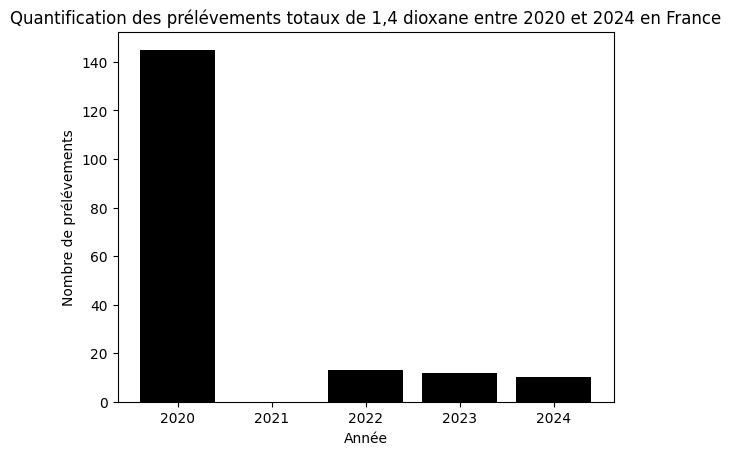

In [ ]:
plt.bar(years, [len(analysis[year]) for year in years], color="k")
plt.ylabel("Nombre de prélévements")
plt.xlabel("Année")
plt.title(
    f"Quantification des prélévements totaux de {compound} entre 2020 et 2024 en France"
)

## Objectif 5.2 : combien de prélévements étaient conformes et non conformes ?

Text(0.5, 1.0, 'Quantification des prélévements non conformes de 1,4 dioxane entre 2020 et 2024 en France')

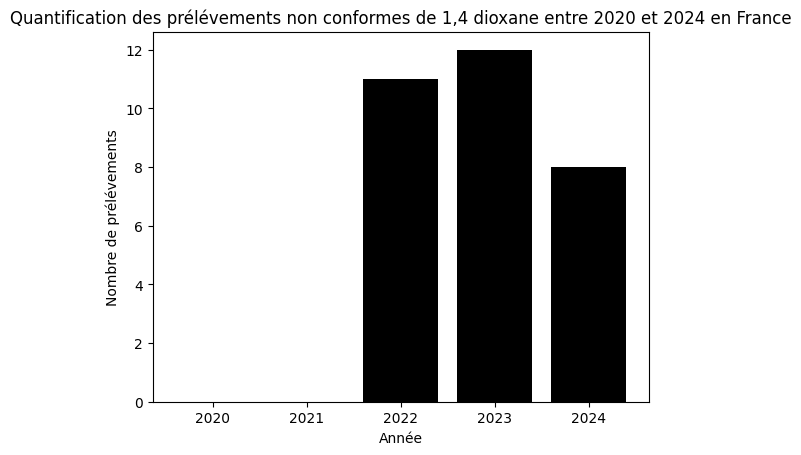

In [25]:
n_non_conformes = {}

for year in years:
    n_non_conformes[year] = len(
        analysis[year][
            (analysis[year]["libminparametre"] == compound)
            & (analysis[year]["valtraduite"] >= seuils[compound])
        ]
    )

plt.bar(years, n_non_conformes.values(), color="k")
plt.ylabel("Nombre de prélévements")
plt.xlabel("Année")
plt.title(
    "Quantification des prélévements non conformes de 1,4 dioxane entre 2020 et 2024 en France"
)

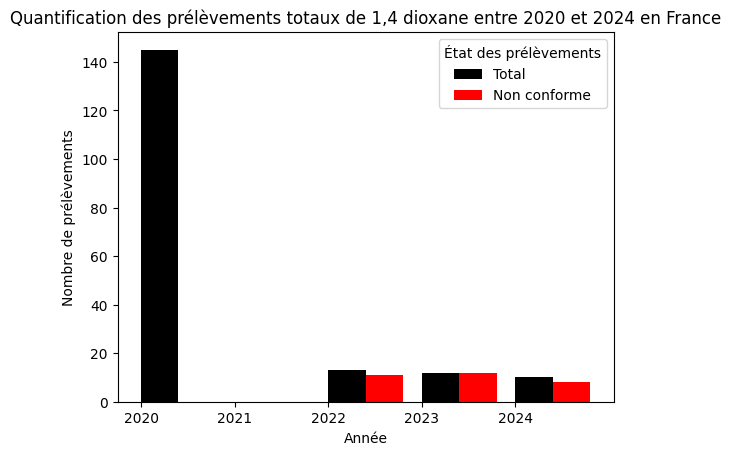

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Création du DataFrame
df = pd.DataFrame(
    {
        "Année": years,
        "Total": [len(analysis[year]) for year in years],
        "Non conforme": [n_non_conformes[year] for year in years],
    }
)

# Graphique avec les barres côte à côte
df.set_index("Année").plot(kind="bar", position=0, width=0.8, color=["black", "red"])

# Labels et titre
plt.ylabel("Nombre de prélèvements")
plt.xlabel("Année")
plt.title(
    f"Quantification des prélèvements totaux de {compound} entre 2020 et 2024 en France"
)
plt.legend(title="État des prélèvements")
# Rotation horizontale et alignement centré des labels de l'axe x
plt.xticks(rotation=0, ha="center")

# Affichage
plt.show()

(0.0, 12.6)

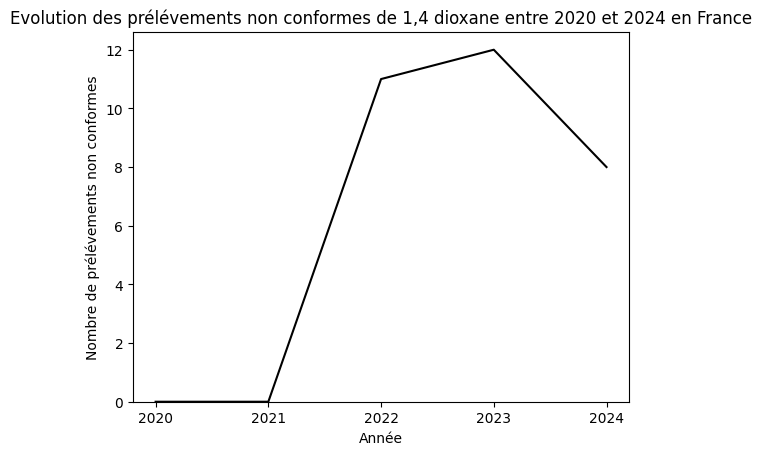

In [ ]:
plt.plot(years, [n_non_conformes[year] for year in years], color="k")

plt.ylabel("Nombre de prélévements non conformes")
plt.xlabel("Année")
plt.title(
    f"Evolution des prélévements non conformes de {compound} entre 2020 et 2024 en France"
)
plt.ylim(bottom=0)

## Résultats Objectif 5.2

### On observe une augmentation de la quantité de prélévements non conformes.

## Questions restées en suspens :
- Le seuil de 0.1µg/L est il correct ?

## Objectif 5.3 : Quelles ARS réalisent ces prélévements ? Quelle évolution ?

In [ ]:
for year in years:
    plt.figure()
    try:
        analysis[year]["nomcommuneprinc"].value_counts()[:10].plot(
            kind="barh", color="k"
        )
    except IndexError:
        # Gestion du cas où aucun test n'a été réalisé
        pass
    plt.gca().invert_yaxis()
    plt.title(f"Communes ayant réalisé le plus de tests de {compound} en {year}")

IndentationError: expected an indented block after 'except' statement on line 7 (1182474089.py, line 9)

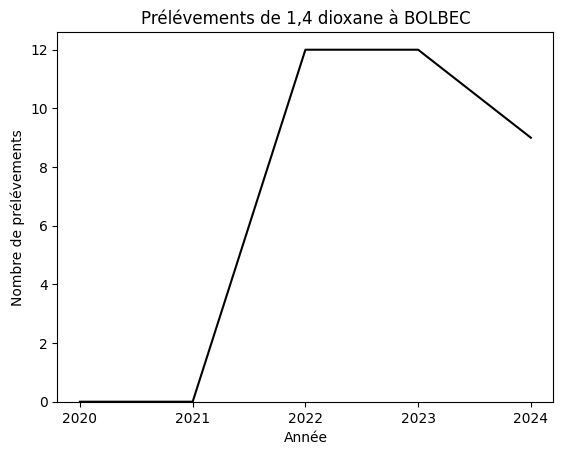

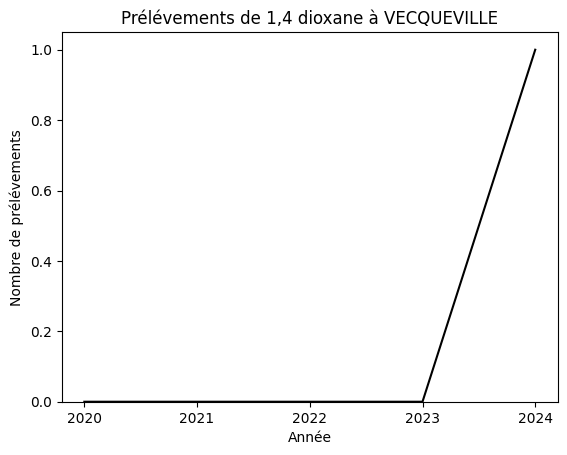

In [40]:
for commune in ["BOLBEC", "VECQUEVILLE"]:
    plt.figure()
    plt.plot(
        years,
        [
            len(analysis[year][analysis[year]["nomcommuneprinc"] == commune])
            for year in years
        ],
        c="k",
    )
    plt.title(f"Prélévements de {compound} à {commune}")
    plt.ylabel("Nombre de prélévements")
    plt.xlabel("Année")
    plt.ylim(bottom=0)

## Résultats Objectif 5.4

- Plusieurs communes testaient en 2020 puis ont arrêté. Depuis 2022 la seule commune qui teste régulièrement est BOLBEC.

## Questions restées en suspens :
- Même question que précédemment, qu'est-ce qu'on recherche exactement ici ? Est-ce qu'on veut représenter les communes où ça teste sur une carte ?

## Objectif 5.4

Quelles catégories de situation existent (NC0, NC1...) ? Sur quelles communes? 

Ici même problème que précédemment, besoin d'une meilleure définition des situations de non conformité avant d'implémenter un classifieur.

**TODO**